#Domain Proyek

#Business Understanding

#Data Understanding

##Import Library

In [1]:
!pip install yfinance
import yfinance as yf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns


##Load Dataset

In [2]:
df = yf.download("ADRO.JK", start="2020-01-01", end="2025-01-01")

# Ubah multi-level columns jadi single-level
df.columns = df.columns.get_level_values(0)


# Lihat hasilnya
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,526.384460,547.510258,524.623977,547.510258,76612000
2020-01-03,539.449158,541.290281,524.720170,537.608034,117795600
2020-01-06,539.449158,557.860392,533.925787,535.766911,61423200
2020-01-07,567.065979,567.065979,537.608006,544.972499,74336500
2020-01-08,554.178162,565.224902,554.178162,563.383779,55121100


##EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1211 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1211 non-null   float64
 1   High    1211 non-null   float64
 2   Low     1211 non-null   float64
 3   Open    1211 non-null   float64
 4   Volume  1211 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 56.8 KB


In [4]:
df.describe()

Price,Close,High,Low,Open,Volume
count,1211.000000,1211.000000,1211.000000,1211.000000,1.211000e+03
mean,1148.679579,1168.713057,1130.888372,1150.039025,9.020292e+07
std,610.158279,619.044146,602.070796,610.503078,7.651315e+07
min,237.504913,246.710530,224.617060,237.504924,0.000000e+00
25%,501.148407,511.542200,494.398794,505.191597,4.325485e+07
50%,1298.309570,1321.924895,1278.151285,1298.309628,7.060990e+07
75%,1545.782471,1563.678049,1518.356183,1538.304150,1.087420e+08
max,2760.000000,2880.000000,2760.000000,2760.000000,1.047877e+09


###Drop Missing Value

In [5]:
volume = (df.Volume == 0).sum()
print(volume)

1


In [6]:
df.loc[(df['Volume']==0)]

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-03-16,305.626526,305.626526,305.626526,305.626526,0


In [7]:
# Drop baris dengan nilai 'Volume' = 0
df = df.loc[(df[['Volume']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
df.shape

(1210, 5)

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
count,1210.000000,1210.000000,1210.000000,1210.000000,1.210000e+03
mean,1149.376317,1169.426352,1131.570406,1150.736886,9.027746e+07
std,609.928439,618.802045,601.851544,610.272098,7.650078e+07
min,237.504913,246.710530,224.617060,237.504924,1.241340e+07
25%,501.518005,512.086103,495.086008,505.193262,4.331902e+07
50%,1298.309570,1323.209923,1279.595928,1298.309630,7.068465e+07
75%,1545.951111,1564.376433,1518.356192,1539.518346,1.087770e+08
max,2760.000000,2880.000000,2760.000000,2760.000000,1.047877e+09


###Mengatasi Outliers

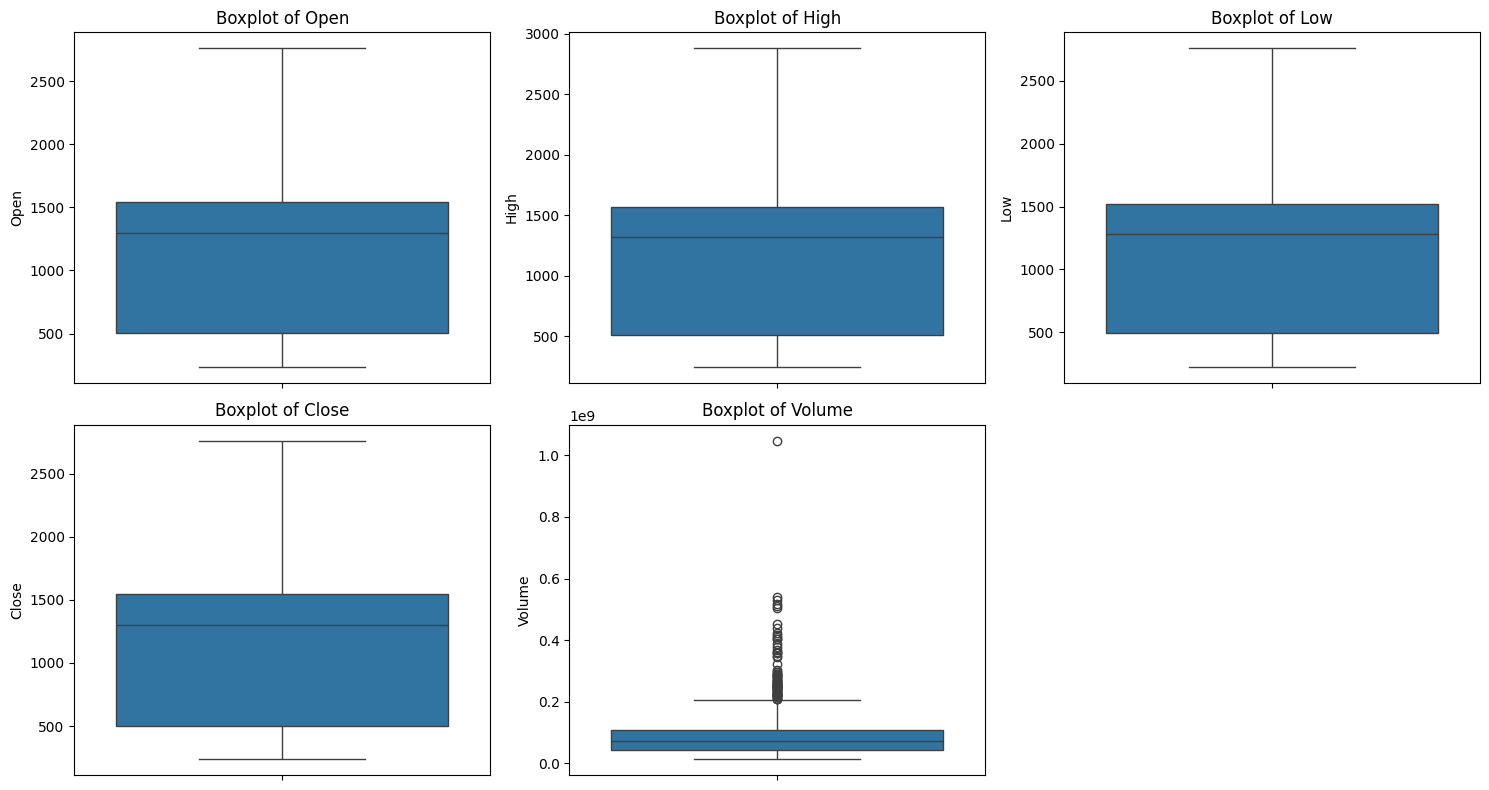

In [9]:
# Buat plot untuk semua kolom numerik
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [10]:
# Hitung Q1, Q3, dan IQR khusus untuk kolom 'Volume'
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk mendeteksi data yang tidak outlier
filter_outliers = ~((df['Volume'] < (Q1 - 1.5 * IQR)) | (df['Volume'] > (Q3 + 1.5 * IQR)))

# Terapkan filter ke seluruh dataset
df_cleaned = df[filter_outliers]

# Cek ukuran dataset setelah outlier Volume dihapus
print(df_cleaned.shape)


(1133, 5)


###Univariate Analysis

In [11]:
# Kolom numerik
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Kolom kategorikal (termasuk object dan datetime)
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category', 'datetime']).columns

print("Fitur numerik:", list(numerical_cols))
print("Fitur kategorikal:", list(categorical_cols))


Fitur numerik: ['Close', 'High', 'Low', 'Open', 'Volume']
Fitur kategorikal: []


####Numerical Features

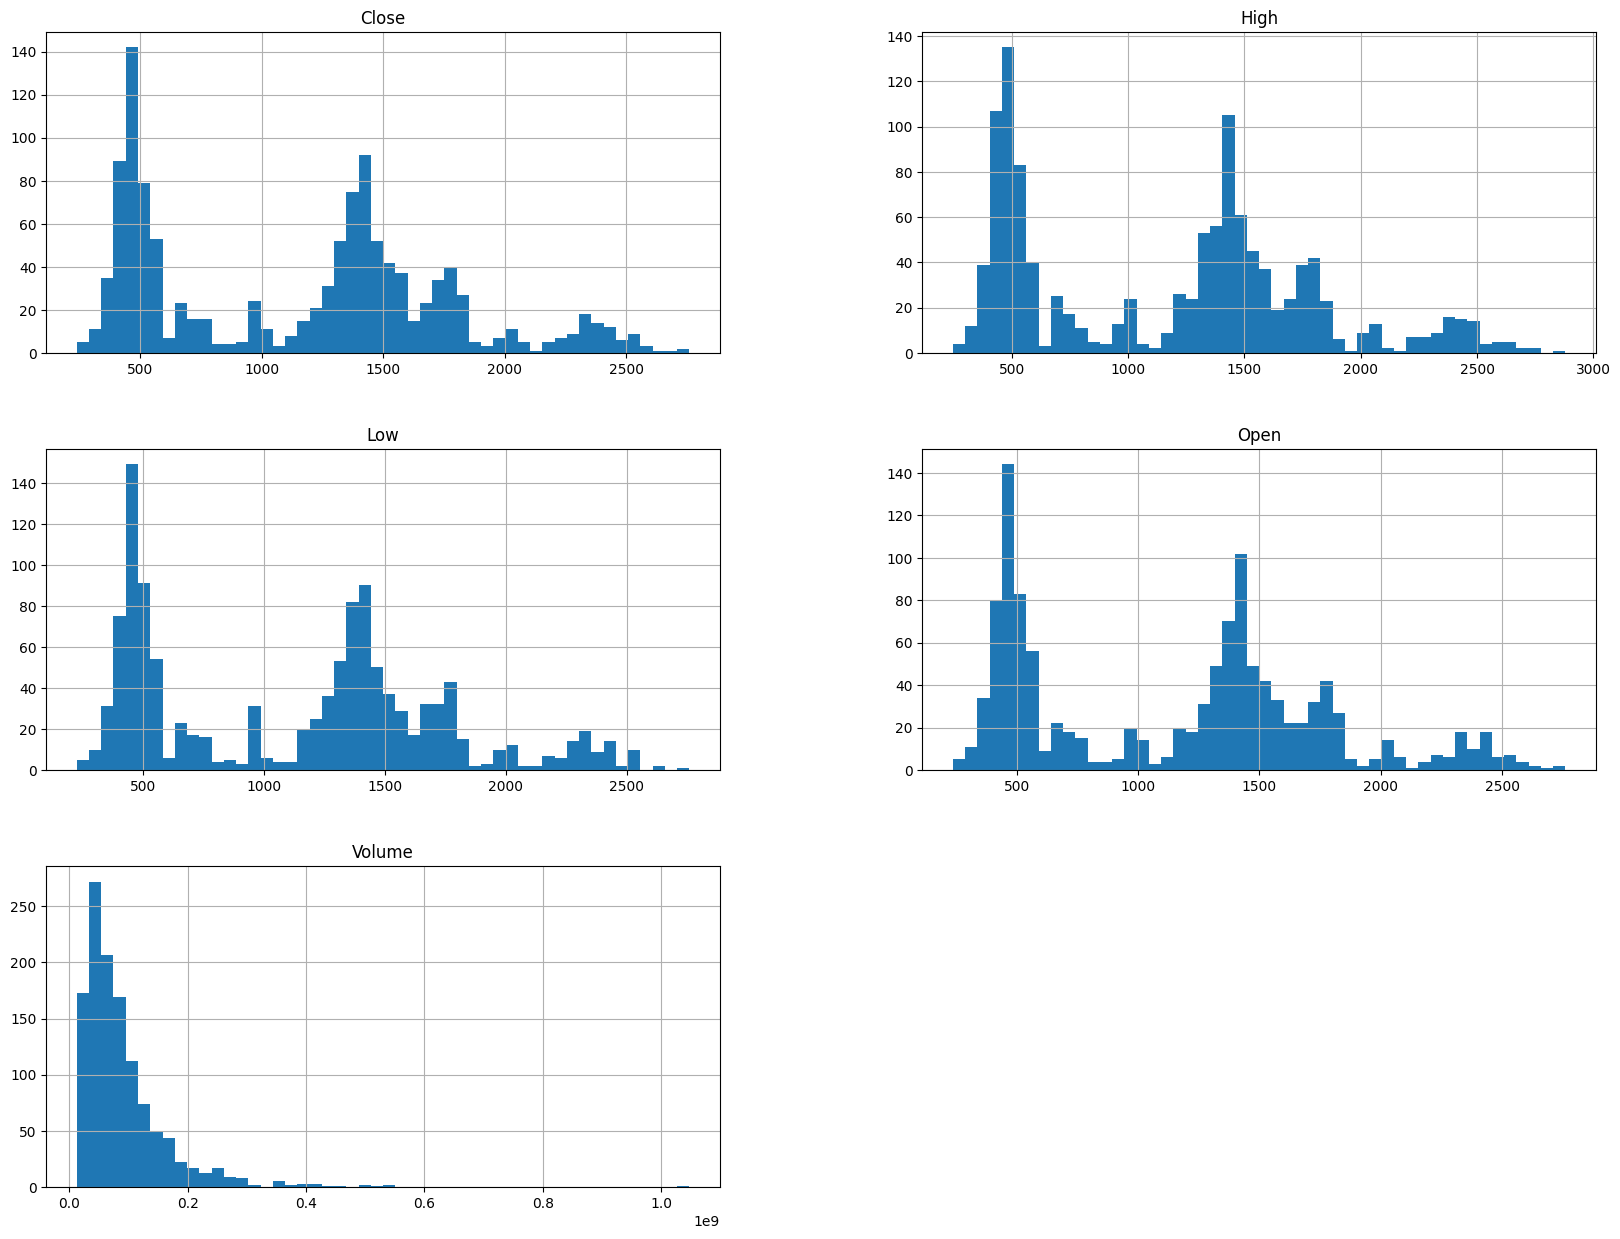

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

###Multivariate Analysis

####Numerical Features

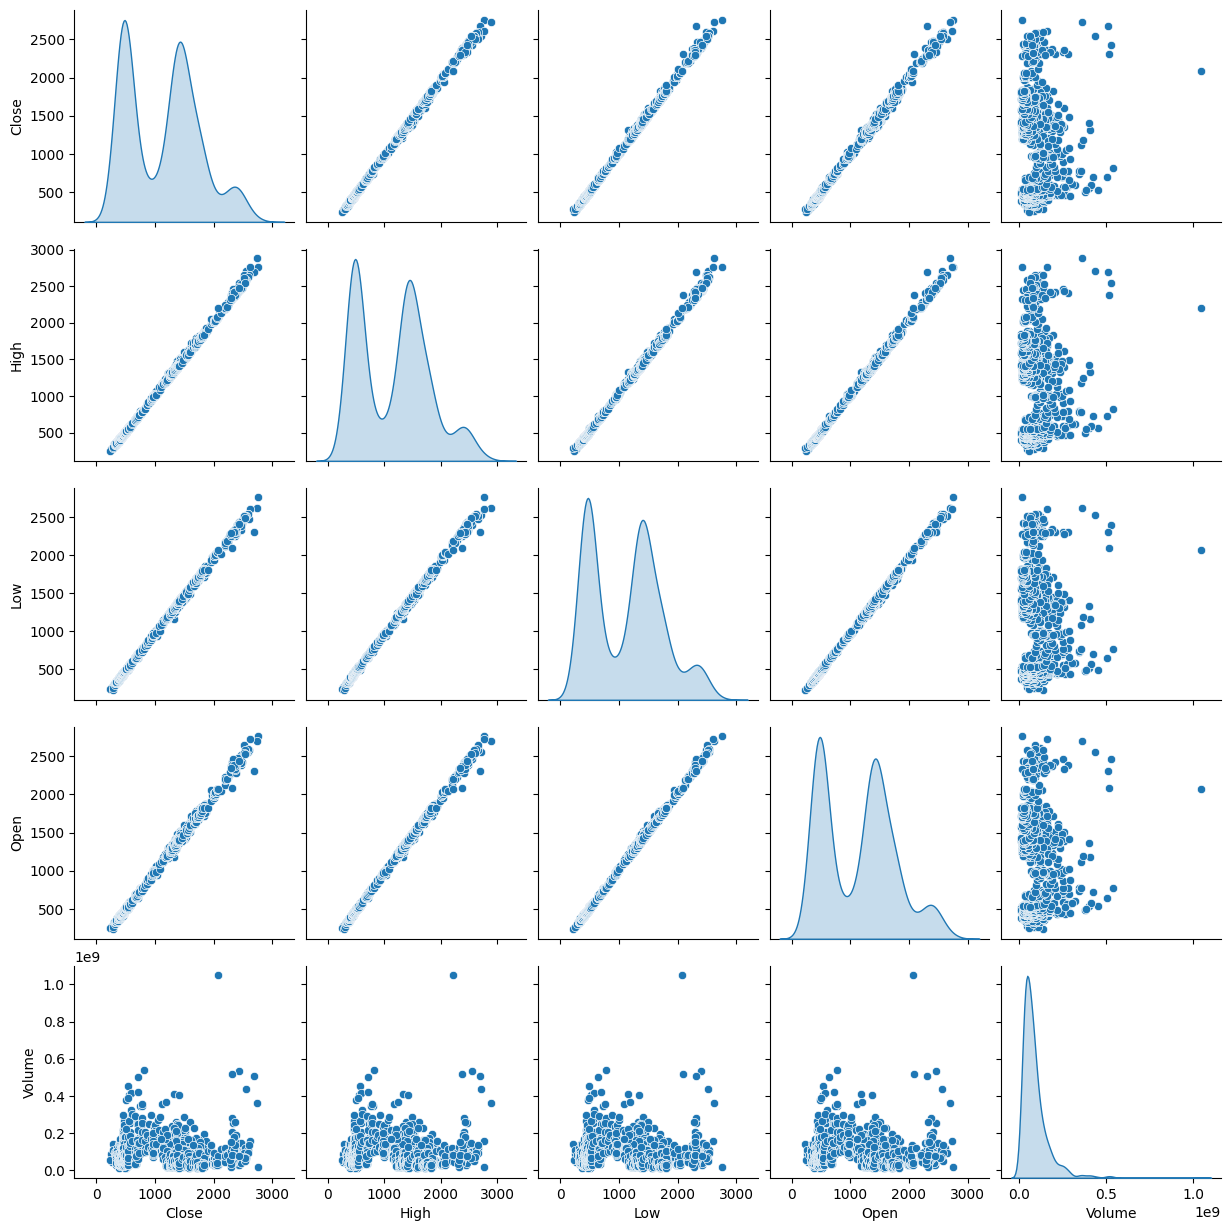

In [14]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

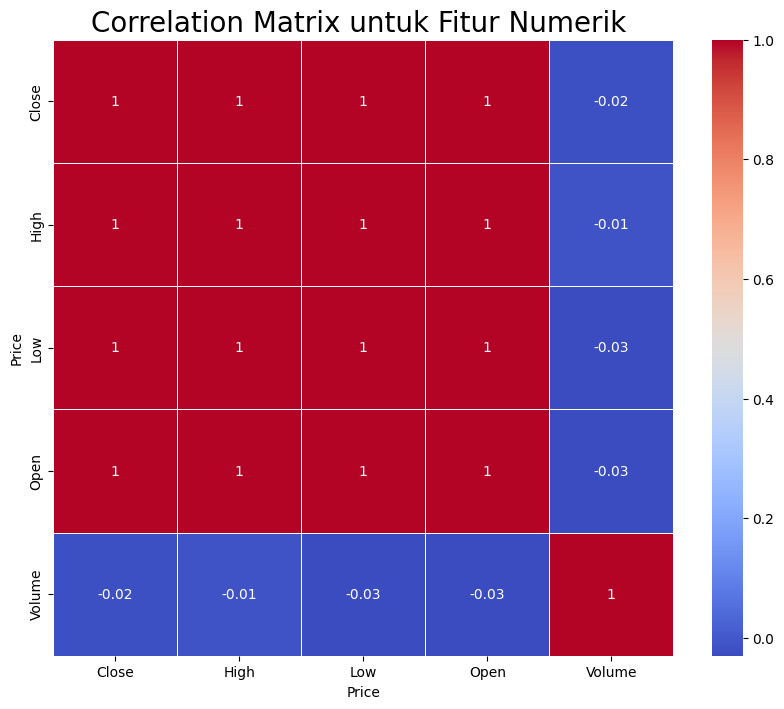

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [17]:
df.drop(['Volume'], inplace=True, axis=1)
df.head()

Price,Close,High,Low,Open
Date,,,,
2020-01-02,526.384460,547.510258,524.623977,547.510258
2020-01-03,539.449158,541.290281,524.720170,537.608034
2020-01-06,539.449158,557.860392,533.925787,535.766911
2020-01-07,567.065979,567.065979,537.608006,544.972499
2020-01-08,554.178162,565.224902,554.178162,563.383779


#Data Preparation

##Reduksi Dimensi Dengan PCA

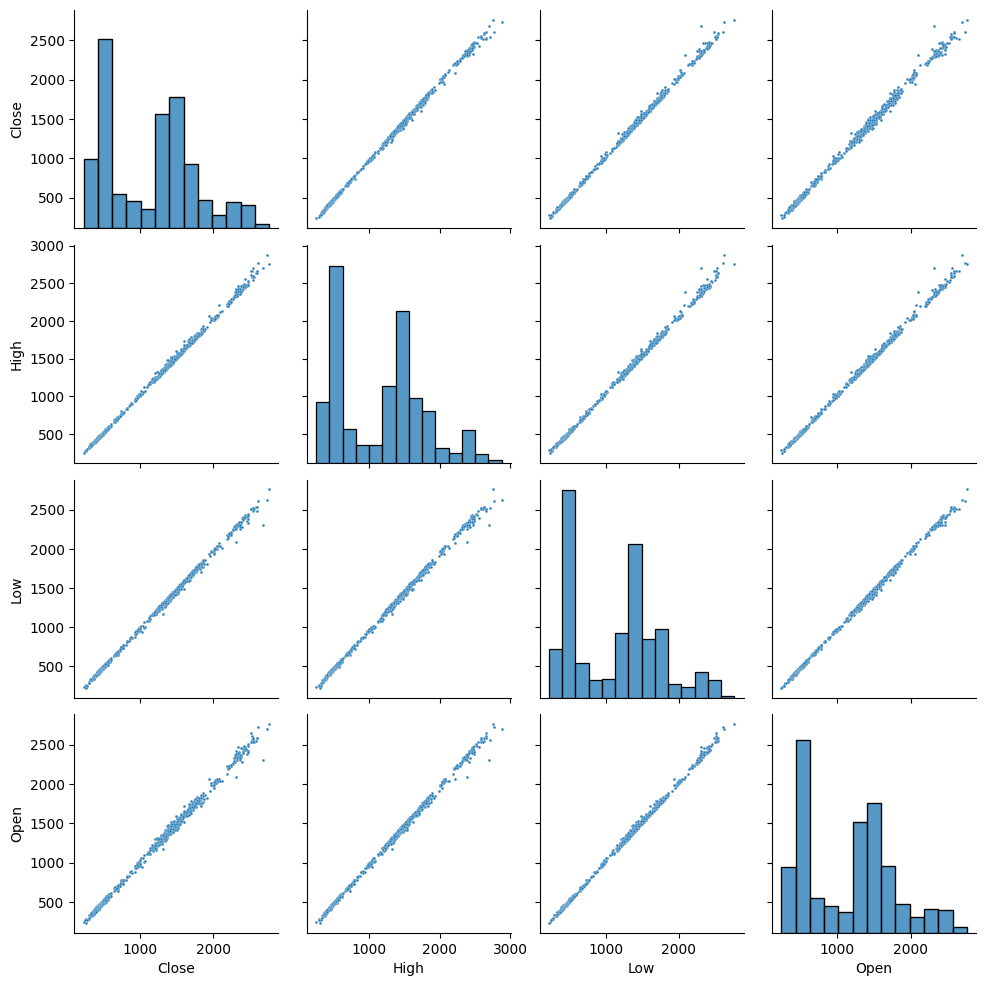

In [22]:
sns.pairplot(df[['Close','High','Low','Open']], plot_kws={"s": 4});

In [40]:
from sklearn.preprocessing import StandardScaler

# Ambil fitur
features = ['Close', 'High', 'Low', 'Open']
X = df[features]

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA setelah standardisasi
pca = PCA(n_components=4, random_state=123)
princ_comp = pca.fit_transform(X_scaled)


In [39]:
pca.explained_variance_ratio_.round(5)

array([9.9949e-01, 3.1000e-04, 1.6000e-04, 3.0000e-05])

##Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

# Misalnya df adalah DataFrame kamu
X = df[['Open', 'High', 'Low']]  # fitur (tanpa 'Close')
y = df['Close']  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,      # 10% data untuk pengujian
    random_state=123    # supaya split-nya konsisten
)


In [42]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1210
Total # of sample in train dataset: 1089
Total # of sample in test dataset: 121


##Standarisasi

In [43]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Open', 'High', 'Low']
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train.loc[:, numerical_cols])
X_train[numerical_cols].head()

Price,Open,High,Low
Date,,,
2024-08-15,1.418492,1.367878,1.418315
2021-02-25,-1.140703,-1.146095,-1.131529
2022-05-25,0.451530,0.414514,0.422062
2022-11-15,0.740488,0.714018,0.730161
2020-11-30,-1.015858,-0.986080,-1.065053


In [45]:
X_train[numerical_cols].describe().round(4)

Price,Open,High,Low
count,1089.0000,1089.0000,1089.0000
mean,-0.0000,0.0000,-0.0000
std,1.0005,1.0005,1.0005
min,-1.5024,-1.4971,-1.5134
25%,-1.0592,-1.0685,-1.0651
50%,0.2366,0.2475,0.2449
75%,0.6343,0.6271,0.6281
max,2.6118,2.7374,2.6807


#Model Deployment

In [46]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])


##KNN

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

##Random Forest

In [48]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

##Metode Adaptive Boosting

In [49]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##Scaling Pada Data Uji

In [51]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_cols] = scaler.transform(X_test[numerical_cols])

#Evaluasi Model

In [52]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.292776,0.245496
RF,0.049505,0.20743
Boosting,5.849046,5.06482


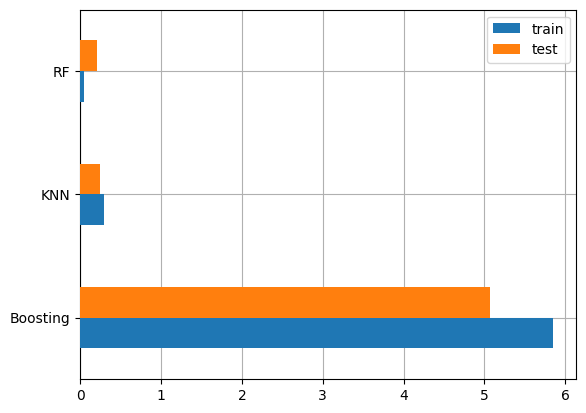

In [53]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

##Uji Data

In [54]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
Date,,,,
2023-12-27,1395.278931,1397.7,1395.1,1358.6
